# **Libraries and Dataset**

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [2]:
#dataset = pd.read_csv('/content/drive/MyDrive/ITS/Semester 01/KK/data/data_market.csv', encoding='latin1')
dataset = pd.read_csv('data/data_market.csv', encoding='latin1')


In [3]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
for x_column in dataset :
    x_sales = dataset['Sales']
    x_profit = dataset['Profit']

    dataset['profit_margin'] = x_profit/x_sales

x_avg = dataset['profit_margin'].mean()

print(x_avg)

0.25022813688212764


In [5]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39


# **Thresholds**

In [6]:
low_profit_threshold = 0.75 * x_avg
high_profit_threshold = 1.279 * x_avg

def categorize_profit(profit_margin):
    if profit_margin < low_profit_threshold:
        return 'Low Profit'
    elif low_profit_threshold <= profit_margin < high_profit_threshold:
        return 'Profit'
    else:
        return 'High Profit'

dataset['Profit_Category'] = dataset['profit_margin'].apply(categorize_profit)

dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Profit_Category
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Profit
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Profit
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low Profit
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low Profit
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High Profit


In [7]:
print(low_profit_threshold)
print(high_profit_threshold)

0.18767110266159573
0.32004178707224124


In [8]:
# dataset.to_csv('data/data_market2.csv', index=False)

In [9]:
dataset = pd.DataFrame(dataset)

In [10]:
dataset['Profit_Category'].unique()

array(['Profit', 'Low Profit', 'High Profit'], dtype=object)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         9994 non-null   object 
 1   Customer Name    9994 non-null   object 
 2   Category         9994 non-null   object 
 3   Sub Category     9994 non-null   object 
 4   City             9994 non-null   object 
 5   Order Date       9994 non-null   object 
 6   Region           9994 non-null   object 
 7   Sales            9994 non-null   int64  
 8   Discount         9994 non-null   float64
 9   Profit           9994 non-null   float64
 10  State            9994 non-null   object 
 11  profit_margin    9994 non-null   float64
 12  Profit_Category  9994 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [12]:
dataset.shape

(9994, 13)

<AxesSubplot:xlabel='Profit_Category', ylabel='Count'>

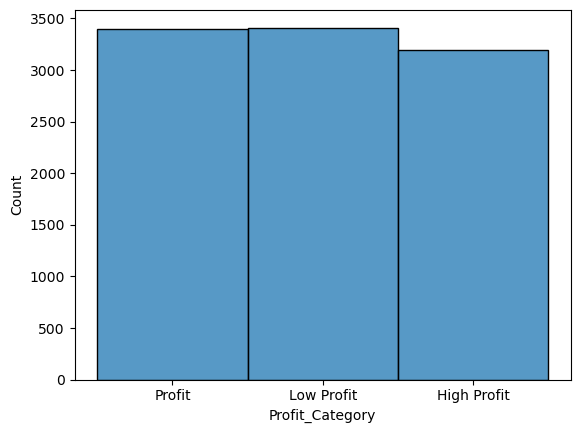

In [13]:
sns.histplot(dataset['Profit_Category'])

# **Split Data and Encoder**

In [14]:
encoder = LabelEncoder()
# X = dataset.drop(['Order ID','Profit_Category','Discount','Sales','profit_margin','Profit'],axis=1)
X = dataset[['Category','Region','City','Profit_Category']]

y = dataset['Profit_Category']

In [15]:
columns_used = X.columns

In [16]:
for col in columns_used :
    X[col] = encoder.fit_transform(X[col])

scaler = MinMaxScaler()
X[columns_used] = scaler.fit_transform(X[columns_used])

for col in columns_used:
    X[col] = X[col].round(2)

X.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14608\2407339416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_14608\2407339416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_used] = scaler.fit_transform(X[columns_used])
C:\Users\Asus\AppData\Local\Temp\ipykernel_14608\2407339416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Category,Region,City,Profit_Category
0,0.83,0.50,0.91,1.0
1,0.17,0.75,0.35,1.0
2,0.50,1.00,0.57,0.5
3,0.67,0.75,0.17,0.5
4,0.50,0.75,0.52,0.0


In [17]:
y = encoder.fit_transform(y)
print(y)

[2 2 1 ... 2 0 1]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Profit_Category
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Profit
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Profit
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low Profit
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low Profit
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High Profit


# **Fuzzy Logic**

In [20]:
data = dataset.drop(['Sales', 'Discount', 'Profit', 'profit_margin'], axis=1)

In [21]:
customer_name = ctrl.Antecedent(np.arange(0, 1, 0.01), 'Customer Name')
category = ctrl.Antecedent(np.arange(0, 1, 0.01), 'Category')
sub_category = ctrl.Antecedent(np.arange(0, 1, 0.01), 'Sub Category')
city = ctrl.Antecedent(np.arange(0, 1, 0.01), 'City')
region = ctrl.Antecedent(np.arange(0, 1, 0.01), 'Region')
state = ctrl.Antecedent(np.arange(0, 1, 0.01), 'State')
order_date = ctrl.Antecedent(np.arange(0, 1, 0.01), 'Order Date')

profit_category = ctrl.Consequent(np.arange(0, 1, 0.01), 'profit_category')

In [22]:
Low = 'Low Profit'
Medium = 'Medium Profit'
High = 'High Profit'

customer_name[Low] = fuzz.trimf(customer_name.universe, [0, 0, 0.5])
customer_name[Medium] = fuzz.trimf(customer_name.universe, [0.2, 0.5, 0.8])
customer_name[High] = fuzz.trimf(customer_name.universe, [0.5, 1, 1])

category[Low] = fuzz.trimf(category.universe, [0, 0, 0.5])
category[Medium] = fuzz.trimf(category.universe, [0.2, 0.5, 0.8])
category[High] = fuzz.trimf(category.universe, [0.5, 1, 1])

# category[Low] = fuzz.trimf(category.universe, [0, 0, 0.5])
# category[Medium] = fuzz.trimf(category.universe, [0.2, 0.5, 0.8])
# category[High] = fuzz.trimf(category.universe, [0.5, 1, 1])

# sub_category[Low] = fuzz.trimf(sub_category.universe, [0, 0, 0.5])
# sub_category[Medium] = fuzz.trimf(sub_category.universe, [0.2, 0.5, 0.8])
# sub_category[High] = fuzz.trimf(sub_category.universe, [0.5, 1, 1])

city[Low] = fuzz.trimf(city.universe, [0, 0, 0.5])
city[Medium] = fuzz.trimf(city.universe, [0.2, 0.5, 0.8])
city[High] = fuzz.trimf(city.universe, [0.5, 1, 1])

region[Low] = fuzz.trimf(region.universe, [0, 0, 0.5])
region[Medium] = fuzz.trimf(region.universe, [0.2, 0.5, 0.8])
region[High] = fuzz.trimf(region.universe, [0.5, 1, 1])

# state[Low] = fuzz.trimf(state.universe, [0, 0, 0.5])
# state[Medium] = fuzz.trimf(state.universe, [0.2, 0.5, 0.8])
# state[High] = fuzz.trimf(state.universe, [0.5, 1, 1])

# order_date[Low] = fuzz.trimf(order_date.universe, [0, 0, 0.5])
# order_date[Medium] = fuzz.trimf(order_date.universe, [0.2, 0.5, 0.8])
# order_date[High] = fuzz.trimf(order_date.universe, [0.5, 1, 1])

profit_category[Low] = fuzz.trimf(profit_category.universe, [0, 0, 0.5])
profit_category[Medium] = fuzz.trimf(profit_category.universe, [0.2, 0.5, 0.8])
profit_category[High] = fuzz.trimf(profit_category.universe, [0.5, 1, 1])

In [23]:
rule1 = ctrl.Rule(category[Low] | region[Low] | city[Low], profit_category[Low])
rule2 = ctrl.Rule(category[Low] | region[Low] | city[Medium], profit_category[Low])
rule3 = ctrl.Rule(category[Low] | region[Medium] | city[Medium], profit_category[Medium])
rule4 = ctrl.Rule(category[Low] | region[Medium] | city[High], profit_category[Medium])
rule5 = ctrl.Rule(category[Low] | region[High] | city[High], profit_category[Medium])
rule6 = ctrl.Rule(category[Medium] | region[Low] | city[Low], profit_category[Low])
rule7 = ctrl.Rule(category[Medium] | region[Medium] | city[Low], profit_category[Medium])
rule8 = ctrl.Rule(category[Medium] | region[Low] | city[Medium], profit_category[Low])
rule9 = ctrl.Rule(category[High] | region[Medium] | city[Low], profit_category[Medium])
rule10 = ctrl.Rule(category[High] | region[High] | city[Low], profit_category[High])
rule11 = ctrl.Rule(category[Low] | region[Medium] | city[Low], profit_category[Low])
rule12 = ctrl.Rule(category[Medium] | region[Medium] | city[Medium], profit_category[Medium])
rule13 = ctrl.Rule(category[Medium] | region[Medium] | city[High], profit_category[High])
rule14 = ctrl.Rule(category[Medium] | region[High] | city[High], profit_category[High])
rule15 = ctrl.Rule(category[High] | region[High] | city[High], profit_category[High])
rule16 = ctrl.Rule(category[High] | region[Medium] | city[High], profit_category[High])
rule17 = ctrl.Rule(category[Medium] | region[High] | city[Medium], profit_category[High])
rule18 = ctrl.Rule(category[High] | region[Medium] | city[Medium], profit_category[High])
rule19 = ctrl.Rule(category[High] | region[High] | city[Medium], profit_category[High])
rule20 = ctrl.Rule(category[Low] | region[High] | city[Low], profit_category[High])
rule21 = ctrl.Rule(category[Low] | region[Low] | city[High], profit_category[Medium])
rule22 = ctrl.Rule(category[Low] | region[High] | city[Medium], profit_category[High])

In [24]:
profit_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11,rule12,rule13,rule14,rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22
])


In [25]:
profit_sim = ctrl.ControlSystemSimulation(profit_ctrl)

profit_sim.input['Category'] = 0.24
profit_sim.input['Region'] = 0.44
profit_sim.input['City'] = 0.65

profit_sim.input['Category'] = 0.24
profit_sim.input['Region'] = 0.44
profit_sim.input['City'] = 0.65

profit_sim.compute()

# **Fuzzy Inferences**

In [26]:
predicted_profit_category = profit_sim.output['profit_category']
print(predicted_profit_category)

0.4938851142680667


c:\Users\Asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


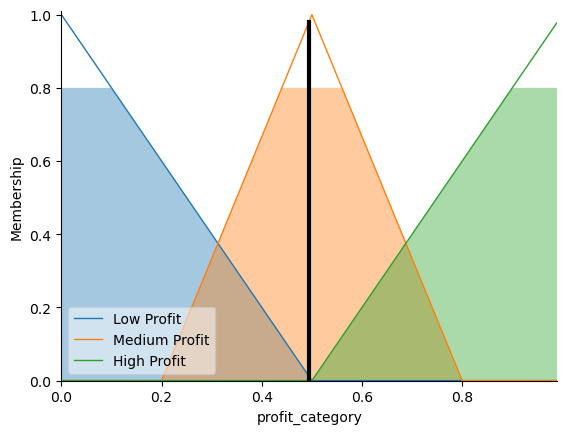

In [27]:
profit_category.view(sim=profit_sim)

In [28]:
profit_sim = ctrl.ControlSystemSimulation(profit_ctrl)
predictions = []
true_values = X_test['Profit_Category'].tolist()

X_test.drop('Profit_Category', axis=1, inplace=True)

In [29]:
for i in range(len(X_test)):
    for column in X_test.columns:
        profit_sim.input[column] = X_test.iloc[i][column]

    profit_sim.compute()

    predicted_profit_category = profit_sim.output['profit_category']
    # predictions.append(predicted_profit_category)
    predictions.append(round(predicted_profit_category, 1))

In [30]:
mae = mean_absolute_error(true_values, predictions)

print("accuracy :", 1.0 - mae)

accuracy : 0.6721860930465233


# **Fuzzy Inferences**

c:\Users\Asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


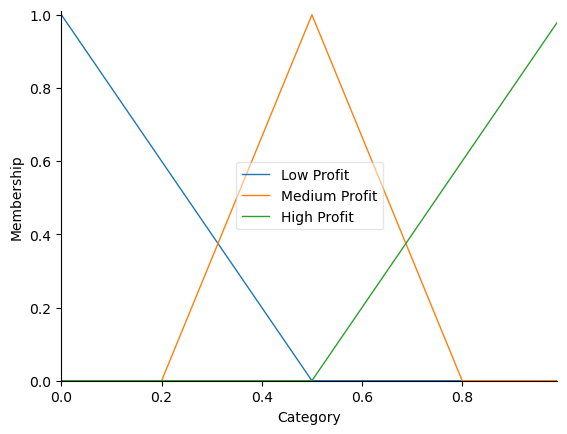

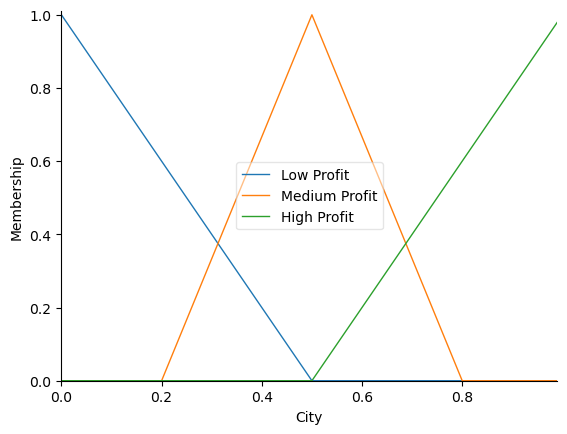

In [31]:
category.view()
city.view()
